# whole blood optimum number of cpgs for ridge regression
DC

#### This notebook:
* 

#### Conclusions:
* 



#### Imports

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
import csv
import os
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
from sklearn.linear_model import RidgeCV
plt.rcdefaults()
warnings.simplefilter('ignore')

#### Import our modules

In [20]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [21]:
# View working directory
os.getcwd()

'/Users/dcox/Desktop/EWAS-organized/blood/feature_selection/optimum_cpgs'

In [22]:
data_path = '../../../data/'
cpg_path = '../../saved_features/'
save_models_path = '../saved_models/'

#### Get Saved imputed whole blood data 2259 cpgs

In [23]:
df_p_working = pd.read_csv(data_path + 'df_p_working_ranked.csv', index_col=0)
df_p_saved = pd.read_csv(data_path +  'df_p_saved_ranked.csv', index_col=0)

#### Get Saved blood cpg rankings

In [24]:
cpgs_XGboost_blood_ranked = pu.get_pickled_object(cpg_path + 'cpgs_XGboost_blood_ranked')

In [25]:
cpgs_XGboost_ranked = cpgs_XGboost_blood_ranked 
top100 = cpgs_XGboost_ranked[:100]

In [26]:
name = 'Ridge'

### Testing different number so of the ranked cpgs

In [27]:
# Run linear regression CV=100  nukmber of times for each number of cpgs in the num_cpgs list
# and record metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

CV=100

alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
mod = mod = RidgeCV(alphas=alphas,cv=5)
    
num_cpgs = [10, 20, 30, 50, 100,200,500,1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
y = df_p_working.age
mean_mses = []
mean_rmses = []
mean_maes = []
mean_r2s = []
mean_rsquaes = []
std_mses = []
std_rmses = []
std_maes = []
std_r2s = []
std_rsquaes = []
for num in num_cpgs:
    X = df_p_working[cpgs_XGboost_blood_ranked[:num]]
    mses = []
    rmses = []
    maes = []
    r2s = []
    rsquaes = []
    for i in range(CV):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        eval_set = [(X_train, y_train),(X_test, y_test)]
        mod.fit(X_train, y_train)
        y_pred = mod.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        rMSE = mean_squared_error(y_test, y_pred, squared=False)
        MAE = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mses.append(MSE)
        rmses.append(rMSE)
        maes.append(MAE)
        r2s.append(r2)
    mean_mses.append(np.array(mses).mean())
    mean_rmses.append(np.array(rmses).mean())
    mean_maes.append(np.array(maes).mean())
    mean_r2s.append(np.array(r2s).mean())
    std_mses.append(np.array(mses).std())
    std_rmses.append(np.array(rmses).std())
    std_maes.append(np.array(maes).std())
    std_r2s.append(np.array(r2s).std())
    print(f'\nThe top {num} cpgs where used, CV={CV}')
    print(f'mean MSE = {np.array(mses).mean():.3f} ± {np.array(mses).std()/(CV**0.5):.3f} ste')
    print(f'mean rMSE = {np.array(rmses).mean():.3f} ± {np.array(rmses).std()/(CV**0.5):.3f} ste')
    print(f'mean MAE = {np.array(maes).mean():.3f} ± {np.array(maes).std()/(CV**0.5):.3f} ste')
    print(f'mean r2 = {np.array(r2s).mean():.3f} ± {np.array(r2s).std()/(CV**0.5):.3f} ste')


The top 10 cpgs where used, CV=100
mean MSE = 38.971 ± 0.438 ste
mean rMSE = 6.233 ± 0.035 ste
mean MAE = 4.598 ± 0.021 ste
mean r2 = 0.907 ± 0.001 ste

The top 20 cpgs where used, CV=100
mean MSE = 33.747 ± 0.352 ste
mean rMSE = 5.801 ± 0.030 ste
mean MAE = 4.241 ± 0.018 ste
mean r2 = 0.920 ± 0.001 ste

The top 30 cpgs where used, CV=100
mean MSE = 30.410 ± 0.311 ste
mean rMSE = 5.507 ± 0.028 ste
mean MAE = 3.983 ± 0.016 ste
mean r2 = 0.928 ± 0.001 ste

The top 50 cpgs where used, CV=100
mean MSE = 29.865 ± 0.362 ste
mean rMSE = 5.455 ± 0.033 ste
mean MAE = 3.921 ± 0.017 ste
mean r2 = 0.929 ± 0.001 ste

The top 100 cpgs where used, CV=100
mean MSE = 27.681 ± 0.358 ste
mean rMSE = 5.250 ± 0.034 ste
mean MAE = 3.810 ± 0.017 ste
mean r2 = 0.934 ± 0.001 ste

The top 200 cpgs where used, CV=100
mean MSE = 25.911 ± 0.334 ste
mean rMSE = 5.080 ± 0.033 ste
mean MAE = 3.656 ± 0.015 ste
mean r2 = 0.939 ± 0.001 ste

The top 500 cpgs where used, CV=100
mean MSE = 25.316 ± 0.376 ste
mean rMSE = 5

In [28]:
X_train.isna().sum()

cg04875128    0
cg16867657    0
cg14361627    0
cg24724428    0
cg00292135    0
             ..
cg11639950    0
cg00614249    0
cg03563238    0
cg26669806    0
cg01476789    0
Length: 2000, dtype: int64

In [29]:
X_train['cg24724428']

GSM3230214    0.164
GSM1345399    0.199
GSM1343074    0.255
GSM1344549    0.230
GSM1343354    0.288
              ...  
GSM1886416    0.117
GSM1069241    0.304
GSM1343939    0.287
GSM1870276    0.341
GSM2337479    0.167
Name: cg24724428, Length: 746, dtype: float64

In [30]:
num_s = ['10', '20', '30', '50', '100','200','500','1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000']

In [31]:
len(mean_rmses)
#plt.bar(num_s, mean_rmses, yerr = ystes)

18

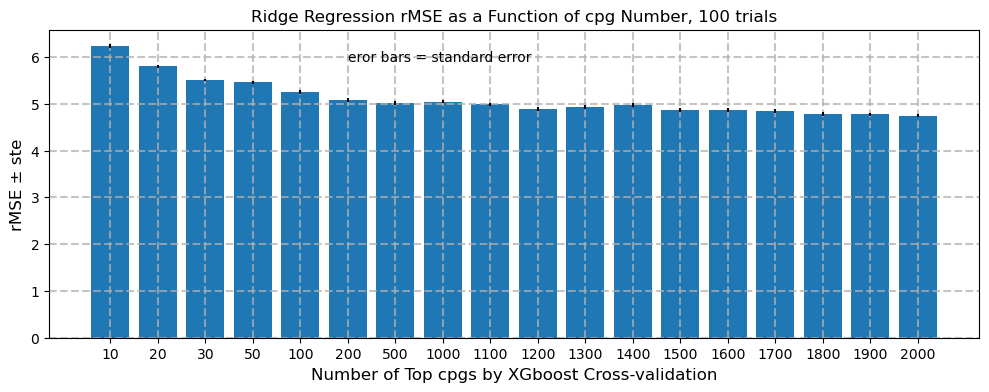

In [32]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.bar(num_s, mean_rmses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('rMSE ± ste', fontsize = fz)
plt.title(name + ' Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error ', (5, 5.9), fontsize=10)
plt.show()

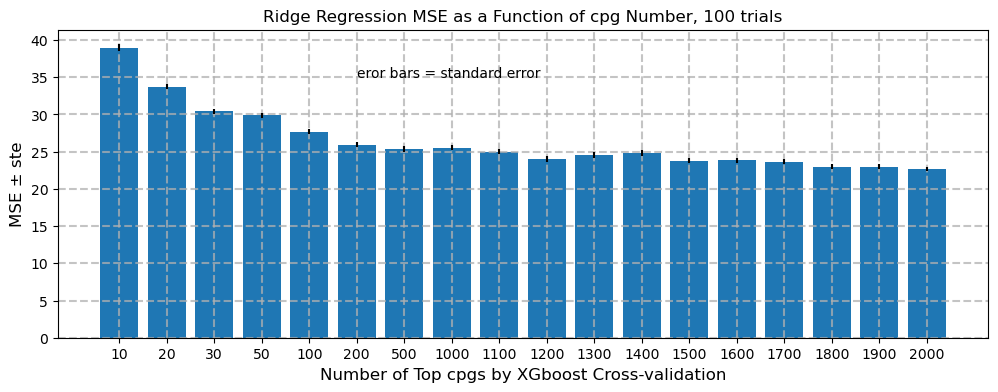

In [33]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± ste', fontsize = fz)
plt.title(name + ' Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 35), fontsize=10)
plt.show()

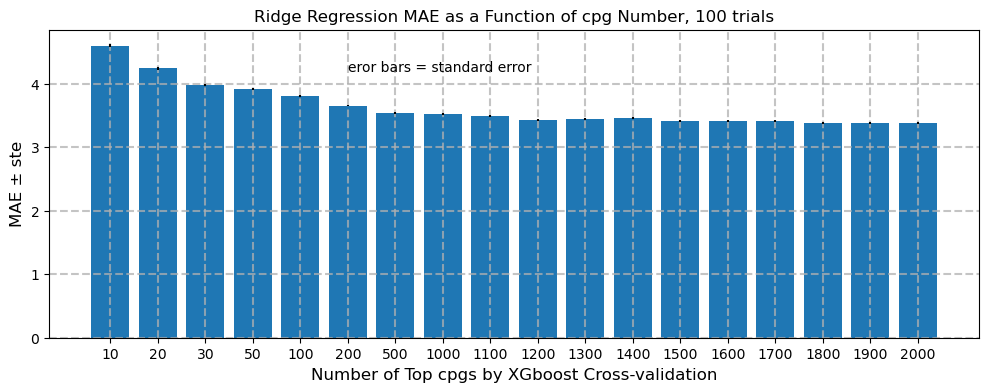

In [34]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_maes)/CV**0.5
plt.bar(num_s, mean_maes, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MAE ± ste', fontsize = fz)
plt.title(name + ' Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 4.2), fontsize=10)
plt.show()

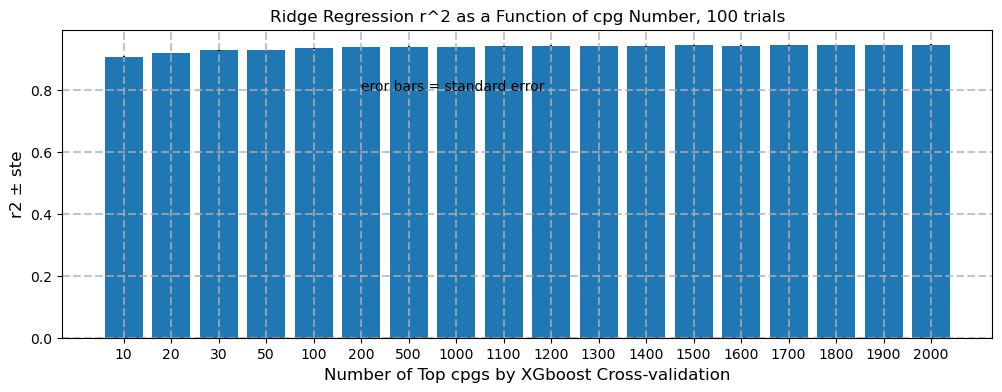

In [35]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.bar(num_s, mean_r2s, yerr = ystes)
plt.ylabel('r2 ± ste', fontsize = fz)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.title(name +  ' Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 0.8), fontsize=10)
plt.show()

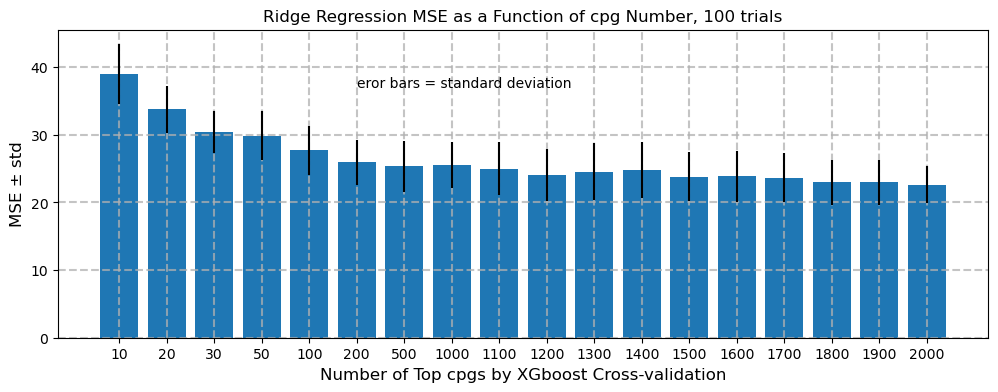

In [36]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± std', fontsize = fz)
plt.title(name + ' Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard deviation', (5, 37), fontsize=10)
plt.show()

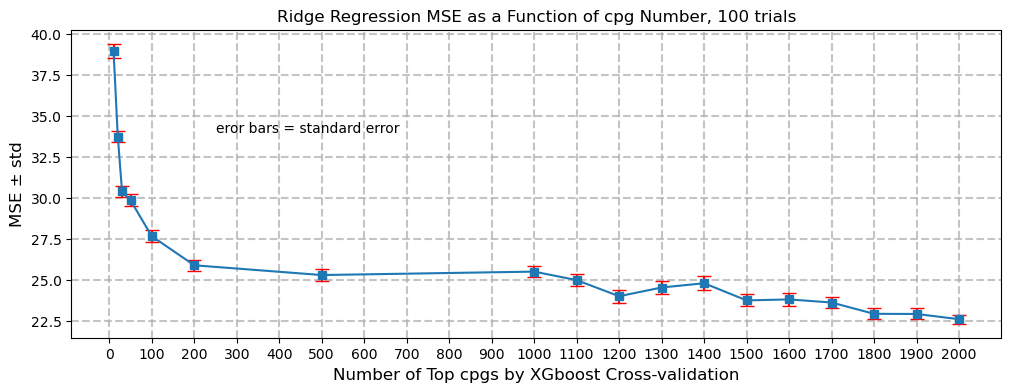

In [37]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.errorbar(num_cpgs, mean_mses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('MSE ± std', fontsize = fz)
plt.title(name +  ' Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 34), fontsize=10)
plt.show()

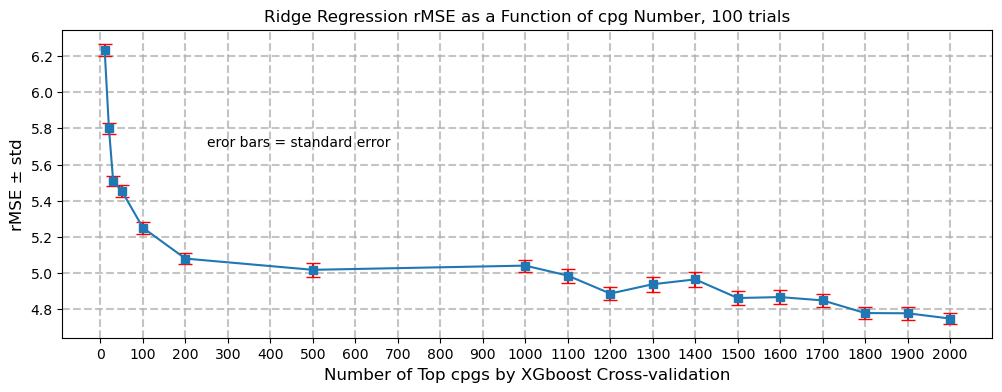

In [38]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.errorbar(num_cpgs, mean_rmses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('rMSE ± std', fontsize = fz)
plt.title(name + ' Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 5.7), fontsize=10)
plt.show()

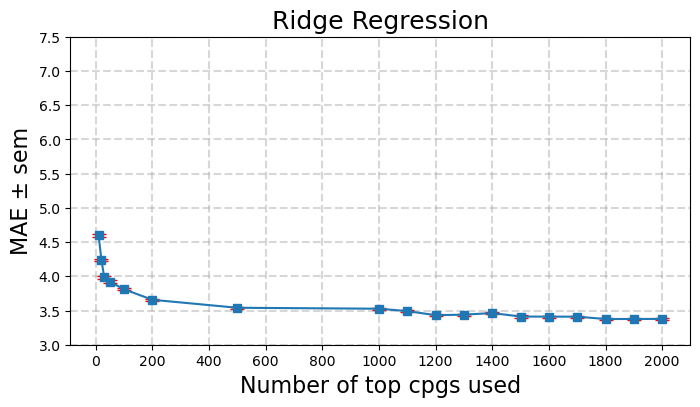

In [41]:
# z = 12
# plt.rcdefaults()
# plt.figure(figsize=(12, 4))
# ystes = np.array(std_maes)/CV**0.5
# plt.errorbar(num_cpgs, mean_maes, marker='s', ecolor='r', yerr = ystes,capsize=5)
# plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
# plt.xticks(range(0,2100,100))
# plt.ylabel('MAE ± std', fontsize = fz)
# plt.title(name +  ' Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
# plt.grid(True, lw=1.5, ls='--', alpha=0.75)
# plt.annotate('eror bars = standard error', (250, 4.35), fontsize=10)
# plt.show()


fz = 16
plt.rcdefaults()
plt.figure(figsize=(8, 4))
ystes = np.array(std_maes)/CV**0.5
plt.errorbar(num_cpgs, mean_maes, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of top cpgs used', fontsize = fz)
plt.xticks(range(0,2100,200))
plt.ylim(3,7.5)
plt.ylabel('MAE ± sem', fontsize = fz)
plt.title('Ridge Regression', fontsize = 18)
plt.grid(True, lw=1.5, ls='--', alpha=0.5)
plt.show()

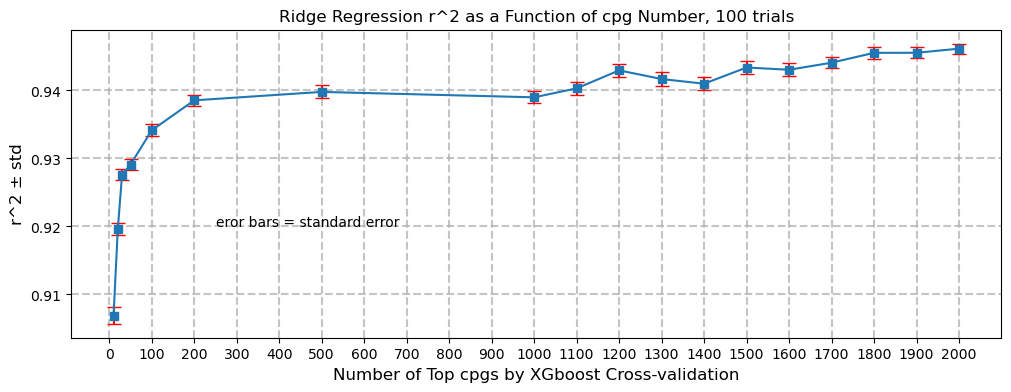

In [40]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.errorbar(num_cpgs, mean_r2s, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('r^2 ± std', fontsize = fz)
plt.title(name + ' Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 0.92), fontsize=10)
plt.show()